<a href="https://colab.research.google.com/github/reccos7/AI_Class/blob/main/AI06b_lab_2018195014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 06b Wine

> 학번: 2018195014
>
> 이름: 이민재

---


### 1. Prepare Data

---

** 와인 분류 문제 **

- 와인에 들어있는 13가지 종류의 성분을 가지고 와인 종류를 분류하는 문제
- 데이터셋의 갯수 총 178개. 분류 클래스 3개. (클래스0 - 59, 클래스1 - 71, 클래스2 - 48)
- Train set - 124, Test set - 54
- 코드에서 다음 3가지 항목들을 변경해보며 test 정확도를 향상:

1. 신경망의 층 수와 노드 수 (Edit 1)
2. 학습률, 배치사이즈, epoch_num (Edit 2)

- test acc가 중간에 **0.90** 이상이 한 번이라도 나오면 PASS


#### Wine recognition dataset

This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

#### Number of Instances:

178 (50 in each of three classes)

#### Attribute Information:

13 numeric, predictive attributes and the class

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline


#### Class

- class_0
- class_1
- class_2

#### Class Distribution

- class_0 (59)
- class_1 (71)
- class_2 (48)


In [ ]:
# ai06_lib 모듈 다운로드
# 일정 시간이 지나서 Colab 런타임과의 연결이 끊어졌다면 다운로드 했던 파일도 사라지기 때문에 다시 다운로드해야 합니다.

!wget https://ycs-class.s3.ap-northeast-2.amazonaws.com/modules/ai06_lib.py

--2021-10-22 18:57:04--  https://ycs-class.s3.ap-northeast-2.amazonaws.com/modules/ai06_lib.py
Resolving ycs-class.s3.ap-northeast-2.amazonaws.com (ycs-class.s3.ap-northeast-2.amazonaws.com)... 52.219.146.47
Connecting to ycs-class.s3.ap-northeast-2.amazonaws.com (ycs-class.s3.ap-northeast-2.amazonaws.com)|52.219.146.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14372 (14K) [binary/octet-stream]
Saving to: ‘ai06_lib.py’

ai06_lib.py         100%[===================>]  14.04K  --.-KB/s    in 0s      

2021-10-22 18:57:05 (59.6 MB/s) - ‘ai06_lib.py’ saved [14372/14372]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split

from ai06_lib import *

In [ ]:
# 데이터셋 로드

wine = datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split( wine.data, wine.target, test_size=0.3, random_state=0 )

print("train data : ", x_train.shape)
print("train label : ", y_train.shape)
print("test data : ", x_test.shape)
print("test label : ", y_test.shape)


train data :  (124, 13)
train label :  (124,)
test data :  (54, 13)
test label :  (54,)


In [ ]:
# Train set에 어떤 내용이 들어있는지 확인

print( 'x_train')
print( x_train[:5] )
print( 'y_train')
print( y_train[:5] )

x_train
[[1.371e+01 1.860e+00 2.360e+00 1.660e+01 1.010e+02 2.610e+00 2.880e+00
  2.700e-01 1.690e+00 3.800e+00 1.110e+00 4.000e+00 1.035e+03]
 [1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00 2.040e+00
  3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]
 [1.327e+01 4.280e+00 2.260e+00 2.000e+01 1.200e+02 1.590e+00 6.900e-01
  4.300e-01 1.350e+00 1.020e+01 5.900e-01 1.560e+00 8.350e+02]
 [1.316e+01 3.570e+00 2.150e+00 2.100e+01 1.020e+02 1.500e+00 5.500e-01
  4.300e-01 1.300e+00 4.000e+00 6.000e-01 1.680e+00 8.300e+02]
 [1.386e+01 1.510e+00 2.670e+00 2.500e+01 8.600e+01 2.950e+00 2.860e+00
  2.100e-01 1.870e+00 3.380e+00 1.360e+00 3.160e+00 4.100e+02]]
y_train
[0 1 2 2 1]


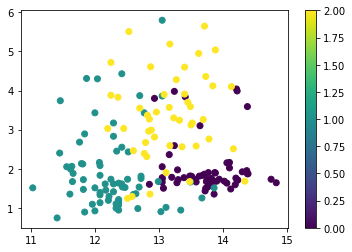

In [ ]:
# 속성 중 첫 번째, 두 번째만 사용하여 분류를 그래프로 표현

plt.scatter(wine.data[:, 0], wine.data[:, 1], c = wine.target)
plt.colorbar()
plt.show()

### 2. Define and Train Model

---

In [ ]:
# hidden_size_list 를 변경하여 신경망의 노드 수, 층 수를 지정할 수 있습니다. (Edit 1)
# 다양한 조합을 시도해보세요.

# 입력층 노드 13개, 출력층 노드 3개는 고정이므로 은닉층의 갯수와 노드 수를 지정해주면 됩니다.
# 예시) 3층 신경망 (은닉층1 노드 3개, 은닉층2 노드 3개)
# hidden_size_list=[3, 3] 

# 예시) 4층 신경망 (은닉층1 노드 5개, 은닉층2 노드 3개, 은닉층3 노드 2개)
# hidden_size_list=[5, 3, 2] 

hidden_size_list = [20]
# hidden_size_list 를 변경하여 신경망의 노드 수나 층 수를 변경할 수 있습니다. (Edit 1)
net = MultiLayerNet( input_size= x_train.shape[1], hidden_size_list=hidden_size_list, output_size=3, 
                    activation='relu', weight_init_std='he' )


# 학습률, 배치사이즈, epoch_num 변경 가능 (Edit 2)

learning_rate = 0.0001
batch_size = 5
epoch_num = 1000


train_size = x_train.shape[0]
batch_per_epoch = train_size // batch_size

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 에폭 단위 반복
for epoch in range(epoch_num):
    
    # 미니 배치 단위 반복
    for batch_i in range(batch_per_epoch):
        
        # 미니배치 가져오기
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        y_batch = y_train[batch_mask]

        # 기울기 계산
        grad = net.gradient(x_batch, y_batch)

        # 가중치 갱신
        for key in net.params:
            net.params[key] -= learning_rate * grad[key]

        # 손실 계산
        loss = net.loss(x_batch, y_batch)

        train_loss_list.append(loss)
   
    # 100 epoch 마다 정확도 출력
    if int(epoch) % 100 == 0:
        train_acc = net.accuracy( x_train, y_train)
        test_acc = net.accuracy(x_test, y_test)
        train_acc_list.append( train_acc )
        test_acc_list.append( test_acc )
        print('epoch: {} loss: {} test accuracy: {:.4f} train accuracy: {:.4f}'.format(epoch, loss, net.accuracy(x_test, y_test), net.accuracy(x_train, y_train) ))
        
        

epoch: 0 loss: 3.223619050191668 test accuracy: 0.4074 train accuracy: 0.3952
epoch: 100 loss: 0.1759358812289856 test accuracy: 0.7222 train accuracy: 0.7419
epoch: 200 loss: 0.1908215071676887 test accuracy: 0.8519 train accuracy: 0.8952
epoch: 300 loss: 0.09150209655243258 test accuracy: 0.8889 train accuracy: 0.9194
epoch: 400 loss: 0.17133581995990016 test accuracy: 0.7963 train accuracy: 0.8387
epoch: 500 loss: 0.016174127747715372 test accuracy: 0.9444 train accuracy: 0.9435
epoch: 600 loss: 0.11337624713921861 test accuracy: 0.8889 train accuracy: 0.8468
epoch: 700 loss: 0.19538436142961424 test accuracy: 0.8889 train accuracy: 0.9194
epoch: 800 loss: 0.14989731696788627 test accuracy: 0.9074 train accuracy: 0.9113
epoch: 900 loss: 0.23595032785759623 test accuracy: 0.9630 train accuracy: 0.9435


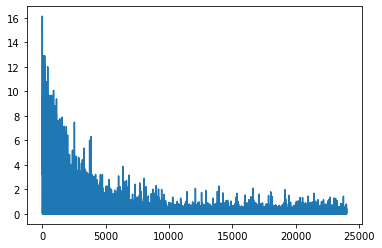

In [ ]:
0# 손실 함수 값의 변화

plt.plot(train_loss_list)
plt.show()

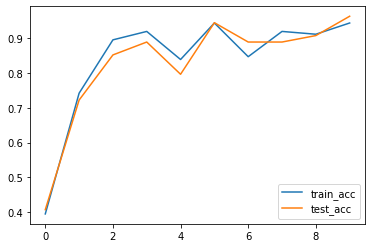

In [ ]:
# Train set, test set 정확도 추이

plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.legend()
plt.show()

### 3. Test Model

---

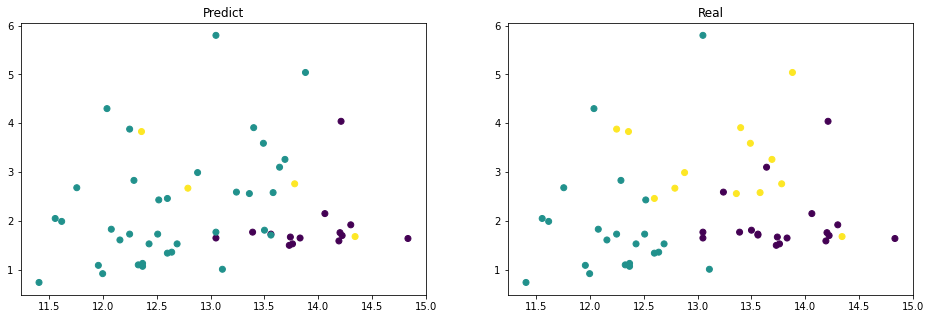

In [ ]:
# 속성 중 두 개만 사용하여 예측 값을 실제와 비교하는 그래프

o_test = net.predict(x_test)
o_test = np.argmax(o_test, axis=1)

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(x_test[:, 0], x_test[:, 1], c = o_test)
ax2.scatter(x_test[:, 0], x_test[:, 1], c = y_test)

ax1.set_title('Predict')
ax2.set_title('Real')

plt.show()